In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
# load data
filename = './SOQ/MgZn_DQC_fluc/soq.txt'
data = np.loadtxt(filename)

n_particles = 46031
Q = data[:,0]
SQ = data[:,1]*n_particles
SQ_sm = gaussian_filter(SQ,sigma=6)

In [3]:
thetas = np.array([0,1,2,3,4])/5*2*np.pi
e = np.array([[np.cos(x),np.sin(x),0] for x in thetas])
l_c = 5.22
l_a = 4.52
phi = (1+np.sqrt(5))/2

l_c_s = 2*np.pi/l_c
l_a_s = 2*np.pi/l_a

d_1_s = l_a_s*e[0]
d_2_s = l_a_s*e[1]
d_3_s = l_a_s*e[2]
d_4_s = l_a_s*e[3]
d_5_s = l_c_s*np.array([0,0,1])

d_s = np.vstack([d_1_s,d_2_s,d_3_s,d_4_s,d_5_s])

d_00002 = 2*np.pi/np.linalg.norm(np.array([0,0,0,0,2])@d_s)
Q_00002 = np.linalg.norm(np.array([0,0,0,0,2])@d_s)

d_10100 = 2*np.pi/np.linalg.norm(np.array([1,0,-1,0,0])@d_s)
Q_10100 = np.linalg.norm(np.array([1,0,-1,0,0])@d_s)

d_10002 = 2*np.pi/np.linalg.norm(np.array([1,0,0,0,2])@d_s)
Q_10002 = np.linalg.norm(np.array([1,0,0,0,2])@d_s)

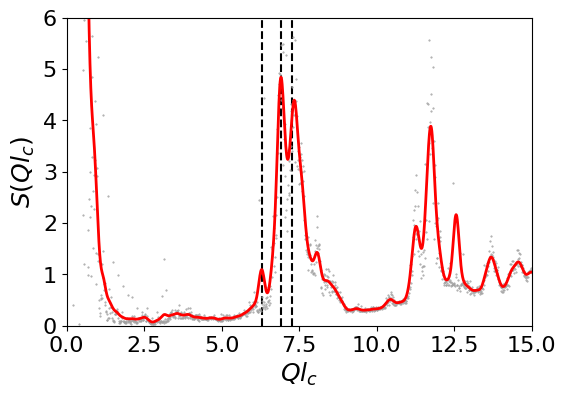

In [4]:
fig,ax = plt.subplots(1,1, figsize=[6, 4])

ax.plot([Q_00002*d_00002,Q_00002*d_00002],[0,20],'--',color='k')
ax.plot([Q_10100*d_00002,Q_10100*d_00002],[0,20],'--',color='k')
ax.plot([Q_10002*d_00002,Q_10002*d_00002],[0,20],'--',color='k')

ax.plot(Q*d_00002,SQ,'.',markersize=1,color='#A0A0A0')
ax.plot(Q*d_00002,SQ_sm,'-r',linewidth=2)

ax.set_xlim(0,15)
ax.set_ylim(0,6)
ax.set_xlabel('$Ql_{c}$',fontsize=18)
ax.set_ylabel('$S(Ql_{c})$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()